In [68]:
pip install matplotlib

     |████████████████████████████████| 12.4MB 453kB/s eta 0:00:01    |█▏                              | 440kB 102kB/s eta 0:01:57     |██                              | 757kB 155kB/s eta 0:01:15     |██▌                             | 972kB 936kB/s eta 0:00:13     |████▍                           | 1.7MB 936kB/s eta 0:00:12     |█████▏                          | 2.0MB 979kB/s eta 0:00:11     |█████▉                          | 2.3MB 979kB/s eta 0:00:11     |████████▏                       | 3.2MB 1.2MB/s eta 0:00:08     |████████▎                       | 3.2MB 1.2MB/s eta 0:00:08     |█████████▊                      | 3.8MB 1.2MB/s eta 0:00:08     |██████████▊                     | 4.2MB 575kB/s eta 0:00:15     |███████████████▍                | 6.0MB 1.4MB/s eta 0:00:05     |███████████████████▏            | 7.4MB 1.4MB/s eta 0:00:04     |███████████████████▌            | 7.6MB 1.4MB/s eta 0:00:04
     |████████████████████████████████| 102kB 940kB/s ta 0:00:01
You should consider upgr

In [1]:
from schrutepy import schrutepy
import pandas as pd
import matplotlib.pyplot as plt

/home/victor/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
df = schrutepy.load_schrute()

In [5]:
df.head()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So..."
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah."
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done."


In [6]:
#Check if we have texts with null values, indeed we have
null_text = pd.isnull(df["text"])
df[null_text]


,index,season,episode,episode_name,director,writer,character,text,text_w_direction
149,150,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Pam,NaN,[Laughing]
345,346,1,2,Diversity Day,Ken Kwapis,B.J. Novak,Jim,NaN,[/b]
1282,1283,1,6,Hot Girl,Amy Heckerling,Mindy Kaling,Kevin,NaN,[nods]
1346,1347,1,6,Hot Girl,Amy Heckerling,Mindy Kaling,Toby,NaN,[looks resigned]
1394,1395,1,6,Hot Girl,Amy Heckerling,Mindy Kaling,Pam,NaN,[smiles]
...,...,...,...,...,...,...,...,...,...
54783,54784,9,24,Finale,Ken Kwapis,Greg Daniels,Bill Hader,NaN,[pulling multiple tissues out]
54937,54938,9,24,Finale,Ken Kwapis,Greg Daniels,Toby,NaN,[dancing with Pam] [sobbing]
54946,54947,9,24,Finale,Ken Kwapis,Greg Daniels,Guy,NaN,[fake cries]
54978,54979,9,24,Finale,Ken Kwapis,Greg Daniels,Rachel,NaN,[speaks in a special language]


In [7]:
#Cleaning
df=df.dropna(subset=['text'])
null_text = pd.isnull(df["text"])
df[null_text]


,index,season,episode,episode_name,director,writer,character,text,text_w_direction


<h1>Questions</h1>
<ul>
    <li> Qual personagem teve mais falas no total ? </li>
    <li> Qual personagem teve mais falas em cada temporada? </li>
    <li> Variação da quantidade de falas por temporada pra cada personagem</li>
    <li> Com quem cada personagem mais interagiu ? </li>
    <li> Qual diretor mais dirigiu episódios? </li>
    <li> Qual a média ratings de cada diretor ? </li>
</ul>


In [15]:
#Qual personagem teve mais falas no total ?
contador_falas = df["character"].value_counts()
contador_falas = contador_falas.to_frame()

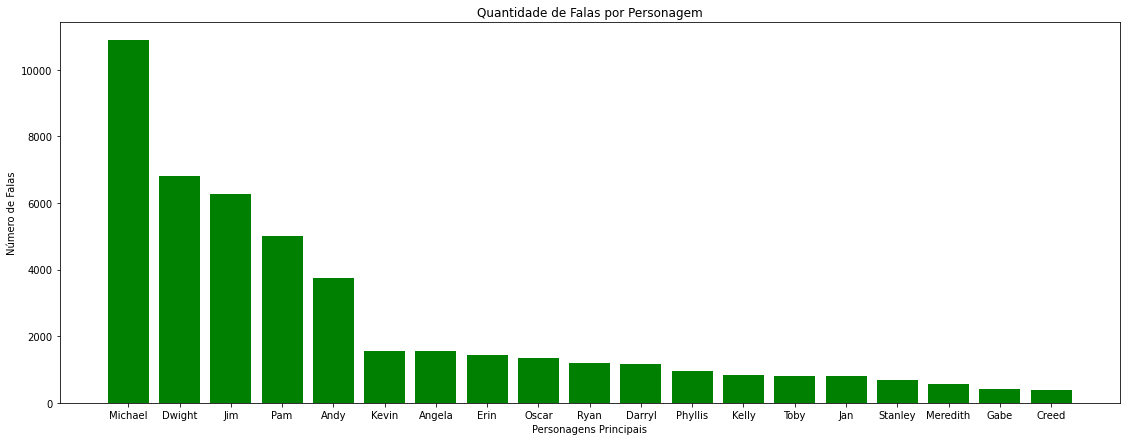

In [28]:
#DATAVIZ here, use thereshold
valores = []
personagens = []
main_cast=["Ryan","Meredith","Creed","Darryl","Gabe","Jan","Andy","Michael","Dwight","Jim","Pam","Angela","Stanley","Erin","Toby","Phyllis","Kelly","Kevin","Oscar"]
for index, value in df["character"].value_counts().items():
    #print(index,value)
    if index in main_cast:
        personagens.append(index)
        valores.append(value)
plt.figure(figsize=(19,7))        
plt.bar(personagens, valores,color='green')
plt.xlabel("Personagens Principais")
plt.ylabel("Número de Falas")
plt.title("Quantidade de Falas por Personagem")

plt.show()

In [29]:
#Quais personagens teve mais falas em cada temporada
season_interest =8
temp = df 
falas_season_1 = temp[temp["season"]==season_interest]
for index, value in falas_season_1["character"].value_counts().items():
    print(index,value)

Andy 1049
Dwight 897
Jim 803
Pam 455
Erin 396
Robert 380
Darryl 298
Nellie 232
Kevin 228
Oscar 222
Ryan 176
Angela 153
Kelly 114
Phyllis 113
Gabe 110
Toby 100
Stanley 83
Meredith 71
Val 56
Cathy 48
Susan 48
Jessica 48
Creed 29
Packer 28
Host 28
David 26
Harry 25
Nate 24
Senator Lipton 23
Irene 22
Walter 21
Bert 19
Brandon 18
Robert California 14
All 13
Everyone 13
Todd Packer 13
Mr. Ramish 11
Lauren 11
Magician 10
Receptionist 8
Tattoo Artist 8
Mose 7
Cece 7
Megan 7
Senator 7
Walter Jr 6
Vet 6
Speaker 6
Kenny 5
Lady 5
Blogger 4
Old Lady 4
Girl 4
Hank 4
Ernesto 4
Bob 4
Glenn 4
Old Man 4
Phone 4
Wally Amos 4
Male Applicant 1 3
Waiter 3
Warehouse Crew 3
Ellen 3
Justine 3
Andy & Walter 3
Calvin 3
Group 3
Curtis 3
Client 3
Oscar's friend 3
Andy and Darryl 3
Park Ranger 3
Stonewall Host 3
Gideon 2
Donna Muraski 2
Others 2
Hide 2
Archivist 2
Narrator 2
Kathy 2
Nurse 2
Various 2
Female Applicant 2
Ravi 2
Paramedic 2
Wrangler 2
Man 2
Photographer 2
Gabe/Kelly/Toby 1
Chelsea's Mom 1
Walter & Wal